<a id="1"></a>

# <p style="padding: 10px; background-color: #97408d; margin: 10px; color: #ffffff; font-family: newtimeroman; font-size: 100%; text-align: center; border-radius: 10px; overflow: hidden; font-weight: 50;"> Loan Eligibility Prediction Project </p>

<a id="1"></a>
# <p style="padding: 10px; background-color: #3d1871; margin: 5px; color: #ffffff; font-family: newtimeroman; font-size: 60%; text-align: right; border-radius: 5px; overflow: hidden; font-weight: 50;">RUSHIKESH BHAMARE</p>


In [1]:
# import python libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\bhama\OneDrive\Documents\Python Projects\Loan Eligibility Prediction Project\Train_data.csv', encoding='unicode_escape')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


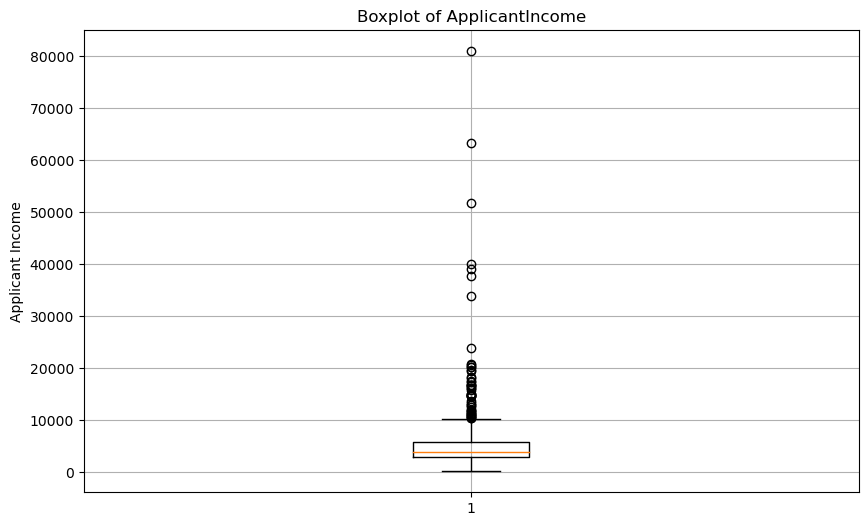

In [8]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['ApplicantIncome'])
plt.title('Boxplot of ApplicantIncome')
plt.ylabel('Applicant Income')
plt.grid(True)

<Axes: >

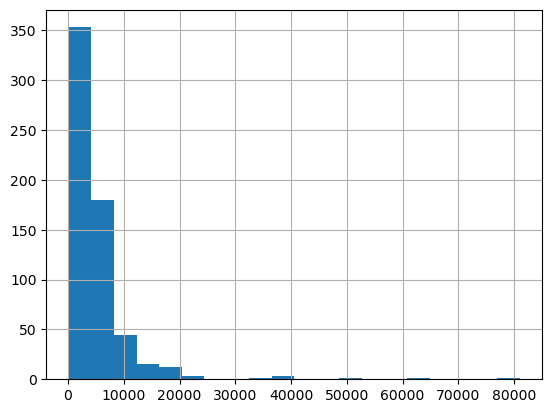

In [9]:
df['ApplicantIncome'].hist(bins=20)

<Axes: >

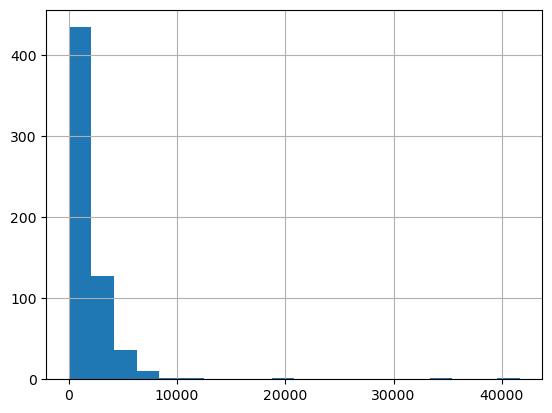

In [10]:
df['CoapplicantIncome'].hist(bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

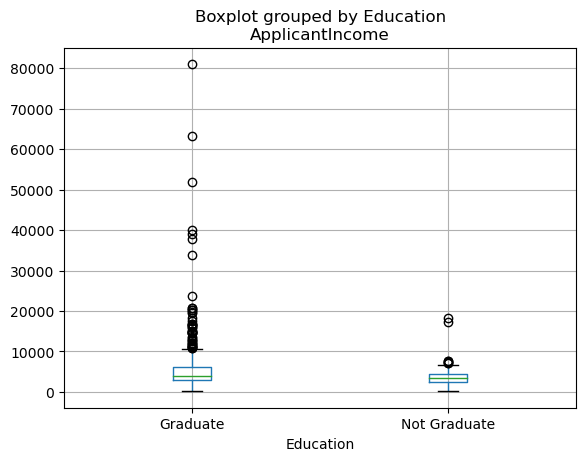

In [11]:
df.boxplot(column='ApplicantIncome', by='Education')

<Axes: >

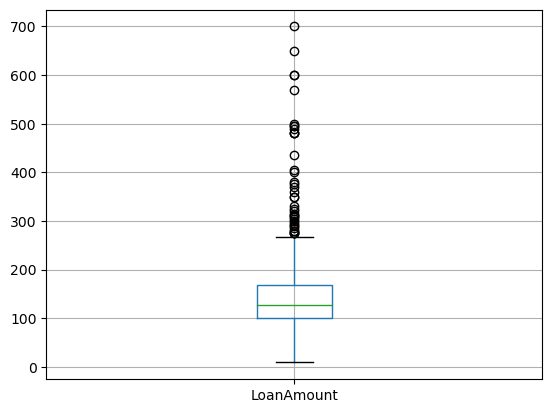

In [12]:
df.boxplot(column='LoanAmount')

<Axes: >

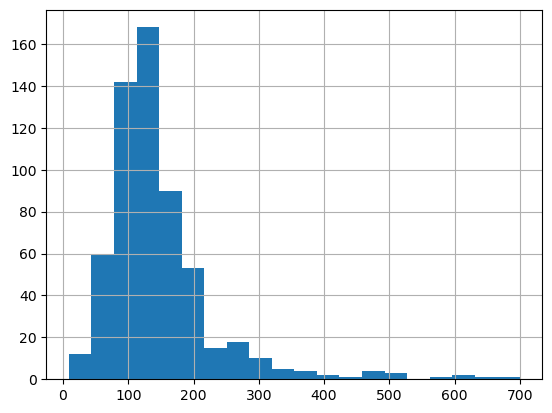

In [13]:
df['LoanAmount'].hist(bins=20)

### As we seen LoanAmount is Right skewed so we have to normalize

In [14]:
df['LoanAmount_log']=np.log(df['LoanAmount'])

<Axes: >

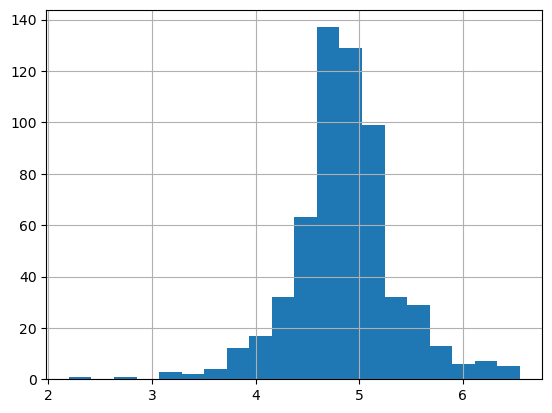

In [15]:
df['LoanAmount_log'].hist(bins=20)

### Check for Missing Values

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

### Deal with Missing Values

In [17]:
# Fill missing values in 'Gender' column with the mode
df['Gender'].fillna(df['Gender'].mode().iloc[0], inplace=True)

In [18]:
# Fill missing values in 'Married' column with the mode
df['Married'].fillna(df['Married'].mode().iloc[0], inplace=True)

In [19]:
# Fill missing values in 'Dependents' column with the mode
df['Dependents'].fillna(df['Dependents'].mode().iloc[0], inplace=True)

In [20]:
# Fill missing values in 'Self_Employed' column with the mode
df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0], inplace=True)

In [21]:
#df['LoanAmount_log'] = pd.to_numeric(df['LoanAmount_log'], errors='coerce')

In [22]:
# Fill missing values in 'LoanAmount_log' column with the mean
df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean(), inplace=True)

In [23]:
#df['LoanAmount'] = pd.to_numeric(df['LoanAmount'], errors='coerce')

In [24]:
# Fill missing values in 'LoanAmount' column with the mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [25]:
# Fill missing values in 'Loan_Amount_Term' column with the mode
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0], inplace=True)

In [26]:
# Fill missing values in 'Credit_History' column with the mode
df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0], inplace=True)

### Let's check Again is there any Null Value or not

In [27]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [28]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760


In [29]:
# Make total Income Column
df['TotalIncome']= df['ApplicantIncome']+df['CoapplicantIncome']

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0


In [31]:
# Normalize Total Income
df['TotalIncome_log']=np.log(df['TotalIncome'])

<Axes: >

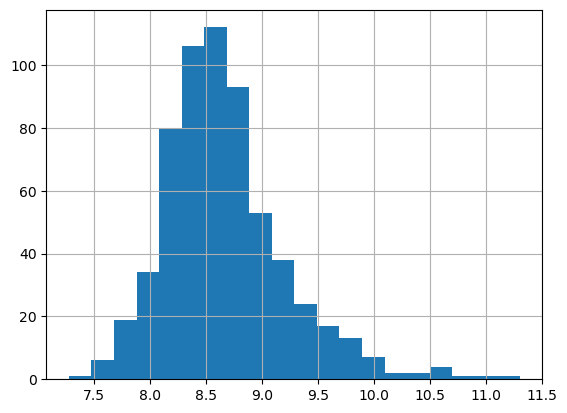

In [32]:
# Let's check it is normalize or not
df['TotalIncome_log'].hist(bins=20)

In [33]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  LoanAmount_log     614 non-null    float64
 14  TotalIncome        614 non-null    float64
 15  TotalIncome_log    614 non-null    float64
dtypes: float64(7), int64(1), o

In [34]:
 # X = Independent Variables
# Y = Dependent Variables i.e. Loan eligibility predict

In [ ]:
# X = df.iloc[:,np.r_[1:6,9:10,11:12,13:14,15:16]].values
# y = df.iloc[:,12].values

In [35]:
X = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  LoanAmount_log     614 non-null    float64
 14  TotalIncome        614 non-null    float64
 15  TotalIncome_log    614 non-null    float64
dtypes: float64(7), int64(1), o

In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [38]:
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [39]:
X[1]

array(['Male', 'Yes', '1', 'Graduate', 360.0, 1.0, 4.852030263919617,
       6091.0], dtype=object)

In [40]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [41]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [44]:
X_test

array([['Male', 'No', '0', 'Graduate', 360.0, 1.0, 4.430816798843313,
        7085.0],
       ['Female', 'No', '0', 'Graduate', 360.0, 1.0, 4.718498871295094,
        4230.0],
       ['Male', 'Yes', '0', 'Graduate', 360.0, 1.0, 5.780743515792329,
        10039.0],
       ['Male', 'Yes', '0', 'Graduate', 360.0, 1.0, 4.700480365792417,
        6784.0],
       ['Male', 'Yes', '2', 'Graduate', 360.0, 1.0, 4.574710978503383,
        3875.0],
       ['Male', 'Yes', '0', 'Not Graduate', 180.0, 0.0, 5.10594547390058,
        6058.0],
       ['Male', 'Yes', '3+', 'Graduate', 180.0, 1.0, 5.056245805348308,
        6417.0],
       ['Male', 'No', '0', 'Graduate', 360.0, 1.0, 6.003887067106539,
        12876.0],
       ['Male', 'No', '0', 'Graduate', 360.0, 0.0, 4.820281565605037,
        5124.0],
       ['Male', 'Yes', '0', 'Graduate', 360.0, 1.0, 4.852030263919617,
        5233.0],
       ['Female', 'No', '0', 'Graduate', 360.0, 1.0, 4.430816798843313,
        2917.0],
       ['Male', 'Yes', '1',

In [45]:
X_train

array([['Male', 'Yes', '0', ..., 1.0, 4.875197323201151, 5858.0],
       ['Male', 'No', '1', ..., 1.0, 5.278114659230517, 11250.0],
       ['Male', 'Yes', '0', ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       ['Male', 'Yes', '3+', ..., 1.0, 5.298317366548036, 8334.0],
       ['Male', 'Yes', '0', ..., 1.0, 5.075173815233827, 6033.0],
       ['Female', 'Yes', '0', ..., 1.0, 5.204006687076795, 6486.0]],
      dtype=object)

 Use Encoder for Convert Catagorical values into numeric format 
such as Male, Female,yes,no etc

In [46]:
X_train[1]

array(['Male', 'No', '1', 'Graduate', 360.0, 1.0, 5.278114659230517,
       11250.0], dtype=object)

In [47]:
from sklearn.preprocessing import LabelEncoder


In [48]:
labelencoder_X = LabelEncoder()

In [49]:
for i in range(0, 5):
    X_train[:, i] = labelencoder_X.fit_transform(X_train[:, i])

In [50]:
X_train[:,7] = labelencoder_X.fit_transform(X_train[:, 7])

In [51]:
labelencoder_y = LabelEncoder()

In [52]:
y_train = labelencoder_y.fit_transform(y_train)

In [53]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [54]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

#### So, All The Train Values are Encoded correctly
#### Do for Test now

In [55]:
for i in range(0,5):
    X_test[:,i]=labelencoder_X.fit_transform(X_test[:,i])

In [56]:
 X_test[:,7]=labelencoder_X.fit_transform(X_test[:,7])

In [57]:
y_test = labelencoder_y.fit_transform(y_test)

In [58]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [59]:
X_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

#### Let's Scale Data For more Accurate Predication 

In [60]:
for i in range(X_train.shape[1]):
    X_train[:, i] = labelencoder_X.fit_transform(X_train[:, i])

In [61]:
for i in range(X_train.shape[1]):
    X_test[:, i] = labelencoder_X.fit_transform(X_test[:, i])

In [62]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [65]:
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [66]:
y_pred =  DTClassifier.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

## Find the Accuracy of Model

In [67]:
from sklearn import metrics
print("The Accuracy of Decision tree is : ", metrics.accuracy_score(y_pred,y_test))

The Accuracy of Decision tree is :  0.7235772357723578


In [68]:
from sklearn.naive_bayes import GaussianNB

# Assuming X_train and y_train are already defined and preprocessed

# Initialize Gaussian Naive Bayes classifier
NBClassifier = GaussianNB()

# Fit the classifier to the training data
NBClassifier.fit(X_train, y_train)


GaussianNB()

In [69]:
y_pred = NBClassifier.predict(X_test)

In [70]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [71]:
print("The Accuracy of Naive bayes is :", metrics.accuracy_score(y_pred,y_test))

The Accuracy of Naive bayes is : 0.8292682926829268


In [72]:
testdata = pd.read_excel(r"C:\Users\bhama\OneDrive\Documents\Python Projects\Loan Eligibility Prediction Project\Test_data.xlsx")

In [73]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban


In [74]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            57 non-null     object 
 1   Gender             56 non-null     object 
 2   Married            57 non-null     object 
 3   Dependents         57 non-null     object 
 4   Education          57 non-null     object 
 5   Self_Employed      52 non-null     object 
 6   ApplicantIncome    57 non-null     int64  
 7   CoapplicantIncome  57 non-null     int64  
 8   LoanAmount         55 non-null     float64
 9   Loan_Amount_Term   53 non-null     float64
 10  Credit_History     53 non-null     float64
 11  Property_Area      57 non-null     object 
dtypes: float64(3), int64(2), object(7)
memory usage: 5.5+ KB


In [75]:
testdata.isnull().sum()

Loan_ID              0
Gender               1
Married              0
Dependents           0
Education            0
Self_Employed        5
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           2
Loan_Amount_Term     4
Credit_History       4
Property_Area        0
dtype: int64

In [76]:
testdata.dropna(inplace=True)

In [77]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

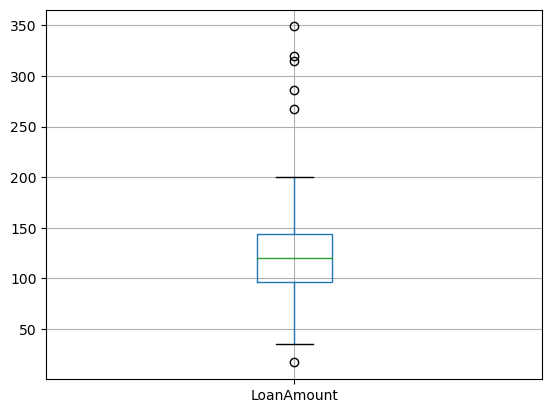

In [78]:
testdata.boxplot(column='LoanAmount')

In [79]:
testdata['LoanAmount_log'] = np.log(testdata['LoanAmount'])

In [80]:
testdata['TotalIncome'] = testdata['ApplicantIncome']+ testdata['CoapplicantIncome']

In [81]:
testdata['TotalIncome_log']=np.log(testdata['TotalIncome'])

In [82]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,TotalIncome,TotalIncome_log
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,4.852030,6091,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,4.189655,3000,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,4.787492,4941,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,4.948760,6000,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267.0,360.0,1.0,Urban,5.587249,9613,9.170872


In [83]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 1 to 56
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            44 non-null     object 
 1   Gender             44 non-null     object 
 2   Married            44 non-null     object 
 3   Dependents         44 non-null     object 
 4   Education          44 non-null     object 
 5   Self_Employed      44 non-null     object 
 6   ApplicantIncome    44 non-null     int64  
 7   CoapplicantIncome  44 non-null     int64  
 8   LoanAmount         44 non-null     float64
 9   Loan_Amount_Term   44 non-null     float64
 10  Credit_History     44 non-null     float64
 11  Property_Area      44 non-null     object 
 12  LoanAmount_log     44 non-null     float64
 13  TotalIncome        44 non-null     int64  
 14  TotalIncome_log    44 non-null     float64
dtypes: float64(5), int64(3), object(7)
memory usage: 5.5+ KB


In [84]:
test = testdata.iloc[:, np.r_[1:5,9:11,12:14]].values

In [85]:
test

array([['Male', 'Yes', 1, 'Graduate', 360.0, 1.0, 4.852030263919617,
        6091],
       ['Male', 'Yes', 0, 'Graduate', 360.0, 1.0, 4.189654742026425,
        3000],
       ['Male', 'Yes', 0, 'Not Graduate', 360.0, 1.0, 4.787491742782046,
        4941],
       ['Male', 'No', 0, 'Graduate', 360.0, 1.0, 4.948759890378168, 6000],
       ['Male', 'Yes', 2, 'Graduate', 360.0, 1.0, 5.58724865840025, 9613],
       ['Male', 'Yes', 0, 'Not Graduate', 360.0, 1.0, 4.553876891600541,
        3849],
       ['Male', 'Yes', '3+', 'Graduate', 360.0, 0.0, 5.062595033026967,
        5540],
       ['Male', 'Yes', 2, 'Graduate', 360.0, 1.0, 5.123963979403259,
        5532],
       ['Male', 'Yes', 1, 'Graduate', 360.0, 1.0, 5.855071922202427,
        23809],
       ['Male', 'Yes', 2, 'Graduate', 360.0, 1.0, 4.248495242049359,
        3900],
       ['Male', 'Yes', 2, 'Graduate', 360.0, 1.0, 5.298317366548036,
        11179],
       ['Male', 'No', 0, 'Graduate', 360.0, 1.0, 4.736198448394496, 4693],
      

In [86]:
test[1]

array(['Male', 'Yes', 0, 'Graduate', 360.0, 1.0, 4.189654742026425, 3000],
      dtype=object)

In [87]:
# Assuming columns 2, 5 are the ones with mixed types (int and str)
columns_to_encode = [2, 4, 5, 6, 7]

# Convert columns with mixed types to strings
for col in columns_to_encode:
    test[:, col] = test[:, col].astype(str)

In [88]:
for i in range(0, 5):
    test[:, i] = labelencoder_X.fit_transform(test[:, i])

In [89]:
test[:, 7] = labelencoder_X.fit_transform(test[:, 7])

In [90]:
test

array([[1, 1, 1, 0, 1, '1.0', '4.852030263919617', 38],
       [1, 1, 0, 0, 1, '1.0', '4.189654742026425', 8],
       [1, 1, 0, 1, 1, '1.0', '4.787491742782046', 25],
       [1, 0, 0, 0, 1, '1.0', '4.948759890378168', 36],
       [1, 1, 2, 0, 1, '1.0', '5.58724865840025', 43],
       [1, 1, 0, 1, 1, '1.0', '4.553876891600541', 16],
       [1, 1, 3, 0, 1, '0.0', '5.062595033026967', 33],
       [1, 1, 2, 0, 1, '1.0', '5.123963979403259', 32],
       [1, 1, 1, 0, 1, '1.0', '5.855071922202427', 6],
       [1, 1, 2, 0, 1, '1.0', '4.248495242049359', 18],
       [1, 1, 2, 0, 1, '1.0', '5.298317366548036', 0],
       [1, 0, 0, 0, 1, '1.0', '4.736198448394496', 23],
       [1, 1, 2, 0, 0, '1.0', '2.833213344056216', 7],
       [1, 0, 0, 0, 1, '1.0', '4.8283137373023015', 26],
       [0, 0, 0, 0, 1, '0.0', '4.330733340286331', 12],
       [1, 1, 0, 1, 1, '1.0', '4.890349128221754', 24],
       [1, 1, 0, 1, 1, '0.0', '4.6443908991413725', 41],
       [1, 1, 1, 0, 1, '1.0', '5.752572638825633', 

In [91]:
test = ss.fit_transform(test)

In [92]:
pred=NBClassifier.predict(test)

In [93]:
pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

## So, The Accuracy of Decision tree is 72.35% & The Accuracy of Naive bayes is 82.95% i.e. 83% approx.

## That's why we have used Naive bayes technique to predict the Loan eligibility prediction in test case

In [98]:
### Portfolio_Link
"https://starboi-rushi.github.io/Rushikesh_bhamare.portfolio/"

'https://starboi-rushi.github.io/Rushikesh_bhamare.portfolio/'

In [96]:
### Github_Link
"https://github.com/Starboi-Rushi"

'https://github.com/Starboi-Rushi'

In [97]:
###Linkdin_Link
"https://www.linkedin.com/in/rushikesh-bhamare-30620021b/"

'https://www.linkedin.com/in/rushikesh-bhamare-30620021b/'

<a id="1"></a>

# <p style="padding: 8px; background-color: #97408d; margin: 8px; color: #ffffff; font-family: newtimeroman; font-size: 90%; text-align: center; border-radius: 8px; overflow: hidden; font-weight: 80;"> Thank you </p>